# Python Data Analysis Foundation and Numpy

This notebook collects codes and concepts for the foundations of data analysis in Python. Numpy package is also introduced to compensate the mathmetical operations incapable of doing by Python list. To give an overview of this document, the following topics are discussed:

I. Data Structure: List, Numpy (with random walk simulation), dictionary, and tuple

II. Loop: for loop, enumerate, list comprehension, and generator

III. Function: Built-in and user-defined functions 

## I. Data Structure
### List Manipulation

In [1]:
fruits = ["apple", 1.5, "banana", 0.98, "strawberry", 3.49]
fruits

['apple', 1.5, 'banana', 0.98, 'strawberry', 3.49]

In [2]:
# Extend the list
fruits = fruits + ["mango", 1.69]
fruits

['apple', 1.5, 'banana', 0.98, 'strawberry', 3.49, 'mango', 1.69]

In [3]:
# Delete items from the list
del(fruits[0:2])
fruits

['banana', 0.98, 'strawberry', 3.49, 'mango', 1.69]

In [4]:
# When you copy x to y, you’re copying the reference, not the value itself.
smoothies = fruits
del(smoothies[0:2])
print("Make smoothies: ", smoothies)
print("Buy fruits: ", fruits)

Make smoothies:  ['strawberry', 3.49, 'mango', 1.69]
Buy fruits:  ['strawberry', 3.49, 'mango', 1.69]


In [5]:
# To create a new list, use:
smoothies_new = list(smoothies)
del(smoothies_new[0:2])
print(smoothies_new, smoothies)

['mango', 1.69] ['strawberry', 3.49, 'mango', 1.69]


In [6]:
# Or use:
fruits_new = fruits[:]
del(fruits_new[0:2])
print(fruits_new, fruits)

['mango', 1.69] ['strawberry', 3.49, 'mango', 1.69]


In [7]:
# List Methods
print(fruits.index("mango"))
print(fruits.count("mango"))

2
1


### Numpy

In [8]:
import numpy as np

In [9]:
x = [2.5, 3.2, 5.4, 0.7]
type(x)

list

In [10]:
np_x = np.array(x)
np_x

array([ 2.5,  3.2,  5.4,  0.7])

In [11]:
print(x + x)
print(np_x + np_x)

[2.5, 3.2, 5.4, 0.7, 2.5, 3.2, 5.4, 0.7]
[  5.    6.4  10.8   1.4]


In [12]:
type(np_x)

numpy.ndarray

In [13]:
np_x.shape

(4,)

### Random walk simulation

In [14]:
# generate a random float between 0 and 1
np.random.rand()

0.4229457723948852

In [15]:
# generate a random integer 0 or 1
np.random.randint(0,2)

1

In [16]:
repeat = 10
steps = 100
paths = []
for i in range(repeat):
    path = [0]
    for i in range(steps):
        toss = np.random.randint(0,2)
        if toss == 0:
            path.append(path[i-1] - 1)
        if toss == 1:
            path.append(path[i-1] + 1)
    paths.append(path)
#print(paths)

In [17]:
import matplotlib.pyplot as plt

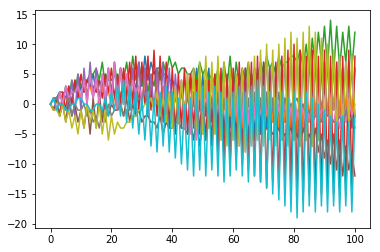

In [18]:
for i in range(10):
    plt.plot(paths[i])
plt.show()

In random walk, the variance of Xi grows with i.

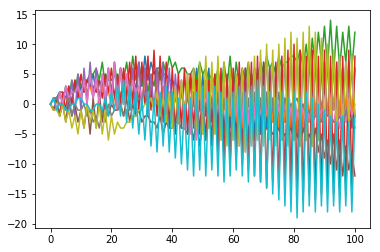

In [19]:
plt.plot(np.transpose(paths))
plt.show()

### Dictionary

In [20]:
dict_fruits = {"apple": 1.5, "banana": 0.98, "strawberry": 3.49}
dict_fruits["apple"]

1.5

In [21]:
dict_fruits.keys()

dict_keys(['strawberry', 'apple', 'banana'])

In [22]:
dict_fruits["mango"] = 1.69
"mango" in dict_fruits

True

In [23]:
del(dict_fruits["banana"])
dict_fruits

{'apple': 1.5, 'mango': 1.69, 'strawberry': 3.49}

### List vs Dictionary Summary

In [24]:
from IPython.display import HTML, display
import tabulate

In [25]:
table = [["List", "Dictionary"],
         ["Select, update and remove: []", "Select, update and remove: []"],
         ["Delete: del()", "Delete: del()"],
         ["Indexed by range of numbers", "Indexed by unique keys"],
         ["Collection of values; order matters",
          "Lookup table with unique keys"]]
display(HTML(tabulate.tabulate(table, tablefmt='html', 
                               headers="firstrow", 
                               stralign = 'center')), )

### Sort dictionaries

It is not possible to sort a dictionary, only to get a representation of a dictionary that is sorted. Dictionaries are inherently orderless, but other types, such as lists and tuples, are not. So you need an ordered data type to represent sorted values, which will be a list—probably a list of tuples.

Reference: https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

#### Solution 1: operator package

In [26]:
import operator

In [27]:
mydict = {'c': 45,
        'f': 32,
        'a': 80,
        'z': 10}
mydict

{'a': 80, 'c': 45, 'f': 32, 'z': 10}

**Use sorted() to sort by key**

Note: Need to indicate reverse=Ture in sorted() while using the code below to sort accendingly.

In [28]:
sorted_mydict = sorted(mydict.items(), 
                       key=operator.itemgetter(1), 
                       reverse = True)
sorted_mydict

[('a', 80), ('c', 45), ('f', 32), ('z', 10)]

In [29]:
mydict.items()

dict_items([('z', 10), ('f', 32), ('a', 80), ('c', 45)])

**Use sorted() to sort by value**

In [30]:
sorted_mydict_byvalue = sorted(mydict.items(), key=operator.itemgetter(0))
sorted_mydict_byvalue

[('a', 80), ('c', 45), ('f', 32), ('z', 10)]

#### Solution 2: anonymous function

In [31]:
sorted(mydict.items(), key=lambda x: x[0])

[('a', 80), ('c', 45), ('f', 32), ('z', 10)]

In [32]:
sorted(mydict.items(), key=lambda x: x[1])

[('z', 10), ('f', 32), ('c', 45), ('a', 80)]

### Tuples
- Like a list - can contain multiple values
- Immutable - can't modiy values!
- Use tuples to make functions return multiple values.

In [33]:
# Unpacking tuples
nums = (2, 5, 8)
a, b, c = nums
print(a)

2


## Loop
### for loop / enumerate

In [34]:
fam = [1.73, 1.68, 1.74, 1.82]
for index, height in enumerate(fam):
    print("index " + str(index) + ": " + str(height))

index 0: 1.73
index 1: 1.68
index 2: 1.74
index 3: 1.82


In [35]:
help(enumerate)

Help on class enumerate in module builtins:

class enumerate(object)
 |  enumerate(iterable[, start]) -> iterator for index, value of iterable
 |  
 |  Return an enumerate object.  iterable must be another object that supports
 |  iteration.  The enumerate object yields pairs containing a count (from
 |  start, which defaults to zero) and a value yielded by the iterable argument.
 |  enumerate is useful for obtaining an indexed list:
 |      (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.



**items()**

In [36]:
# Use items() to loop dictionary
for fruit, price in dict_fruits.items():
    print(fruit + ": " + str(price))

strawberry: 3.49
mango: 1.69
apple: 1.5


**np.nditer()**

In [37]:
# For 2D arrays, for loop prints out two arrays one by one. 
# To print out the values in each array one by one, use np.nditer().
np_xy = np.array([[15, 23, 18, 40],
                  [3, 5, 8, 12]])
for val in np_xy:
    print(val)

[15 23 18 40]
[ 3  5  8 12]


In [38]:
for val in np.nditer(np_xy):
    print(val)

15
23
18
40
3
5
8
12


### List Comprehension

In [39]:
nums = [12, 5, 8, 39, 20]
[round(num * 0.8, 2) for num in nums]

[9.6, 4.0, 6.4, 31.2, 16.0]

In [40]:
# Create a 5 x 5 matrix using a list of lists: matrix
matrix = [[i for i in range(5)] for i in range(5)]
for row in matrix:
    print(row)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


In [41]:
# Conditionals in comprehensions
[num + 10 if num <10 else num for num in nums]

[12, 15, 18, 39, 20]

In [42]:
# Conditionals on the iterable
[num * 2 for num in nums if num < 10]

[10, 16]

### Generator
Lazy evaluation – the value of the evaluation is delayed until the value is needed. This would help when dealing with extremely large sequences since you don’t want to store the entire list in the memory.

In [43]:
# List comprehension
[2 * num for num in range(10)]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [44]:
# Use () instead of []
(2 * num for num in range(10))

<generator object <genexpr> at 0x0000026765432C50>

In [45]:
# print values for generators
result = (2 * num for num in range(10))
print(next(result))
print(next(result))

0
2


### Generator vs. List comprehensions
A generator for large sequences could be easily created because it does not yet create the entire list. Anything we can do on a list comprehension can also be done on a generator expression. However, generator could be more efficient to process large iterators. Remember to convert a generator to a list when printing it out.

## Function
### filter()
The result of filter() needs to be converted to a list. Otherwise, it is just a filter object.

In [46]:
houses = ['Targaryen', 'Stark', 'Lannister', 'Greyjoy', 
          'Arryn', 'Baratheon', 'Tully', 'Tyrell', 'Martell']
result = filter(lambda x: len(x) > 7, houses)
print(result)
print(list(result))

['Targaryen', 'Lannister', 'Baratheon']


### enumerate(), zip(), and unpack()

In [47]:
house = enumerate(houses)
print(type(house))

<class 'enumerate'>


In [48]:
print(list(house))

[(0, 'Targaryen'), (1, 'Stark'), (2, 'Lannister'), (3, 'Greyjoy'), (4, 'Arryn'), (5, 'Baratheon'), (6, 'Tully'), (7, 'Tyrell'), (8, 'Martell')]


In [49]:
sigils = ['Dragon', 'Direwolf', 'Lion', 'Kraken', 
          'Falcon', 'Stag', 'Trout', 'Rose', 'Sunspear']
z = zip(houses, sigils)
print(type(z))
print(list(z))

<class 'zip'>
[('Targaryen', 'Dragon'), ('Stark', 'Direwolf'), ('Lannister', 'Lion'), ('Greyjoy', 'Kraken'), ('Arryn', 'Falcon'), ('Baratheon', 'Stag'), ('Tully', 'Trout'), ('Tyrell', 'Rose'), ('Martell', 'Sunspear')]


In [50]:
z = zip(houses, sigils)
for house, sigil in z:
    print(house, sigil)

Targaryen Dragon
Stark Direwolf
Lannister Lion
Greyjoy Kraken
Arryn Falcon
Baratheon Stag
Tully Trout
Tyrell Rose
Martell Sunspear


In [51]:
z = zip(houses, sigils)
print(*z)

('Targaryen', 'Dragon') ('Stark', 'Direwolf') ('Lannister', 'Lion') ('Greyjoy', 'Kraken') ('Arryn', 'Falcon') ('Baratheon', 'Stag') ('Tully', 'Trout') ('Tyrell', 'Rose') ('Martell', 'Sunspear')


In [52]:
# Using * and zip to 'unzip'
z = zip(houses, sigils)
result1, result2 = zip(*z)
print(result1)
print(result2)

('Targaryen', 'Stark', 'Lannister', 'Greyjoy', 'Arryn', 'Baratheon', 'Tully', 'Tyrell', 'Martell')
('Dragon', 'Direwolf', 'Lion', 'Kraken', 'Falcon', 'Stag', 'Trout', 'Rose', 'Sunspear')


### User-defined Functions
Docstrings describe what your function does and serve as documentation for your function. It's placed in the immediate line after the function heder and in between triple double quotes """.

In [54]:
def square(value):
    """Return the square of a value."""
    new_value = value ** 2
    return new_value

### Name an anonymous function

In [55]:
echo_word = (lambda word, echo: word * echo)
echo_word('hey', 5)

'heyheyheyheyhey'

### Python's built-in scope

In [56]:
import builtins
dir(builtins)[:10]

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError']